In [72]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from midparser import MidParser
import csv



### Lendo arquivo do CSV

In [22]:
table = pd.read_csv('total_big.csv', encoding = "ISO-8859-1")
table[10:110]

,average_note,range_notes,average_duration,average_silence,average_diff_notes,instrument,simultaneously,min,max,trackName,filename,vocal
10,35.938931,3,192.681934,86.030534,1.732824,16,11,38,35,Drums- BD&SD,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
11,42.754348,19,248.893478,28.845652,1.252174,16,126,57,38,Drums- Other,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
12,61.666667,15,1711.040000,868.080000,4.840000,52,50,69,54,Choir Accomp,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
13,61.466357,24,702.243619,16.174014,3.918794,0,294,76,52,Piano Accomp,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
14,61.888889,10,593.444444,5521.555556,3.666667,27,3,65,55,Elec. Guitar,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
15,70.794521,34,415.082192,860.684932,3.698630,30,17,86,52,Distortion guitar,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
16,90.144737,14,521.894737,907.907895,2.236842,9,5,98,84,Bells,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
17,66.125000,11,1982.125000,11580.625000,7.250000,80,3,73,62,Synth Harmonics,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
18,63.088431,24,150.654255,20.516622,4.361702,25,1008,76,52,Steel-string Guit.,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False
19,78.000000,18,1199.000000,15600.000000,12.500000,119,1,87,69,Shooting Stars,C:/Users/frensch/Downloads/130000_Pop_Rock_Cla...,False


### Contagem de registros com vocal

In [23]:
len(table.loc[table['vocal'] == True])

12214

### Contagem de registros sem vocal

In [24]:
len(table.loc[table['vocal'] == False])

67339

### Balanceando o dataset

Random under-sampling:
True     12214
False    12214
Name: vocal, dtype: int64


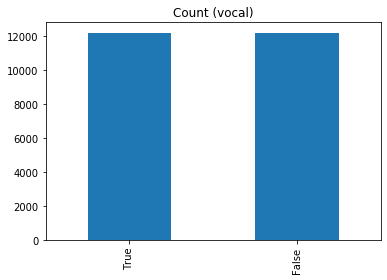

In [25]:
# Class count
count_class_0, count_class_1 = table.vocal.value_counts()

# Divide by class
df_class_0 = table[table['vocal'] == 0]
df_class_1 = table[table['vocal'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
table_undersamp = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(table_undersamp.vocal.value_counts())
table_undersamp.vocal.value_counts().plot(kind='bar', title='Count (vocal)')

### Feature selection

In [26]:
#table_undersamp[table_undersamp.columns[0:3]].corr()['vocal'][:]
table_undersamp.corr()

,average_note,range_notes,average_duration,average_silence,average_diff_notes,instrument,simultaneously,min,max,vocal
average_note,1.000000,0.012581,0.009726,-0.068471,-0.105302,0.317522,-0.144152,0.868462,0.878044,0.445436
range_notes,0.012581,1.000000,-0.019985,-0.079603,0.482209,-0.141087,0.382818,0.453918,-0.409830,-0.190806
average_duration,0.009726,-0.019985,1.000000,0.091948,0.122559,0.053909,-0.029772,-0.001557,0.015883,-0.025060
average_silence,-0.068471,-0.079603,0.091948,1.000000,-0.095318,0.001266,-0.072186,-0.094332,-0.026954,-0.004882
average_diff_notes,-0.105302,0.482209,0.122559,-0.095318,1.000000,-0.141296,0.391108,0.120968,-0.297861,-0.304312
instrument,0.317522,-0.141087,0.053909,0.001266,-0.141296,1.000000,-0.206878,0.206077,0.334343,0.392018
simultaneously,-0.144152,0.382818,-0.029772,-0.072186,0.391108,-0.206878,1.000000,0.052169,-0.281372,-0.228451
min,0.868462,0.453918,-0.001557,-0.094332,0.120968,0.206077,0.052169,1.000000,0.626747,0.297720
max,0.878044,-0.409830,0.015883,-0.026954,-0.297861,0.334343,-0.281372,0.626747,1.000000,0.471637
vocal,0.445436,-0.190806,-0.025060,-0.004882,-0.304312,0.392018,-0.228451,0.297720,0.471637,1.000000


### Separando Dataset em cross validation

In [27]:
y = table_undersamp.vocal * 1
x = (table_undersamp.drop(['vocal', 'average_duration', 'average_silence'] , axis=1))
X_train_w_name, X_test_w_name, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = (X_train_w_name.drop(['trackName', 'filename'] , axis=1))
X_test = (X_test_w_name.drop(['trackName', 'filename'] , axis=1))
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print ("train", X_train.shape, y_train.shape)
print ("teste", X_test.shape, y_test.shape)
print ("train_vocal",len(X_train.loc[y_train == 1]))
print ("test_vocal",len(X_test.loc[y_test == 1]))

train (19542, 7) (19542,)
teste (4886, 7) (4886,)
train_vocal 9797
test_vocal 2417


### Treinamento classificador SVM

In [11]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

y_trainpred = clf.predict(X_train)

accuracyTrain = accuracy_score(y_train, y_trainpred)
print("AccuracyTrain: %.2f%%" % (accuracyTrain * 100.0))

accuracy = accuracy_score(y_test, y_pred)
print("AccuracyTest: %.2f%%" % (accuracy * 100.0))

AccuracyTrain: 78.61%
AccuracyTest: 77.79%


### Treinamento classificador

In [9]:
from sklearn.neural_network import MLPClassifier

#clf = svm.SVC(gamma='scale')
#clf.fit(X_train, y_train)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_trainpred = clf.predict(X_train)

accuracyTrain = accuracy_score(y_train, y_trainpred)
print("AccuracyTrain: %.2f%%" % (accuracyTrain * 100.0))

accuracy = accuracy_score(y_test, y_pred)
print("AccuracyTest: %.2f%%" % (accuracy * 100.0))


AccuracyTrain: 50.11%
AccuracyTest: 49.56%


### Variar classificadores

In [10]:
rfc_parameters = [{
    'n_estimators': [10, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 30, 50],
    'min_samples_leaf': [2, 5, 10]#,
    #'class_weight': ['balanced']
}]

lrc_parameters = [{
    'penalty': ['l2'],
    'tol': [1e-4, 1e-6, 1e-8],
    'C': [0.1, 0.3, 1, 3, 10, 30, 100],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}]

nbc_parameters = [{
    'var_smoothing': [1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
}]

knn_parameters = [{
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2]
    
}]

svm_parameters = [{
    'C': [1, 3, 10, 30, 100, 300],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 5],
    'shrinking': [False,True],
    'probability': [False, True],
    'tol': [1e-3, 1e-5]
}]

#fazer for para cada classificador
clf_set = []
rfc = RandomForestClassifier()
lrc = LogisticRegression()
nbc = GaussianNB()
knn = KNeighborsClassifier()
svmc = svm.SVC(gamma='scale')
clfs = [rfc, lrc, nbc, knn]
clfs_params = [rfc_parameters, lrc_parameters, nbc_parameters, knn_parameters, svm_parameters]

for iclfs in range(len(clfs)):
    classifier = clfs[iclfs]
    parameters = clfs_params[iclfs]
    gsearch = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1)
    gsearch.fit(X_train, y_train)
    clf_set.append(gsearch.best_estimator_)
    print('i: ', iclfs, ' Best Score: ', gsearch.best_score_)
    print('i: ', iclfs, ' Best Parameters: ', gsearch.best_params_)

i:  0  Best Score:  0.8910485193402141
i:  0  Best Parameters:  {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 100}
i:  1  Best Score:  0.7804089900646282
i:  1  Best Parameters:  {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
i:  2  Best Score:  0.7876917140927945
i:  2  Best Parameters:  {'var_smoothing': 1e-08}
i:  3  Best Score:  0.8572875470242114
i:  3  Best Parameters:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


### Usando melhor classificador encontrado

In [28]:
#clf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, n_estimators=50)
clf = RandomForestClassifier(criterion='gini', max_depth=50, min_samples_leaf=2, n_estimators=100)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("AccuracyTest: %.2f%%" % (accuracy * 100.0))

AccuracyTest: 88.83%


### Testando predição com música específica

In [76]:
#mypath = 'c:/temp/midi'
#f = 'Yes_-_Owner_of_a_Lonely_Heart.mid'
#mypath = 'C:/Users/frensch/Downloads/130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]/130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]/T/T'
#f = 'taylor_swift-love_story.mid'
mypath='C:\\Users\\frensch\\Downloads\\130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]\\130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]\\C\\C'
f = 'Creedence Clearwater Revival - Bad Moon Rising.mid'
midparser = MidParser()
midparser.run(mypath + '/' + f)
print('HasVocal',midparser.hasVocal)
tracks = []
print(len(midparser.notesInfos))
for track in midparser.notesInfos:
    #print(len(midparser.notesInfos))
    print('track has vocal', track.vocalTrack, 'avegare', "{0:.0f}".format(track.sumNotes/track.countNotes), \
        'min',track.minNote, 'max',track.maxNote, 'name', track.trackName)
    tracks.append([track.sumNotes/track.countNotes , track.maxNote-track.minNote, \
                   track.sumPitchDiff/track.countNotes, track.instrument, track.notesSimultaneously, \
                   track.minNote, track.maxNote])

#print(tracks)
y_pred = clf.predict_proba(tracks)
print(y_pred)



HasVocal True
10
track has vocal False avegare 36 min 31 max 43 name bass                
track has vocal False avegare 57 min 53 max 62 name elec guitar         
track has vocal False avegare 71 min 62 max 81 name electric guit 2     
track has vocal False avegare 46 min 45 max 50 name rhythm guitar       
track has vocal False avegare 57 min 43 max 67 name other guitar        
track has vocal True avegare 76 min 71 max 79 name vocals              
track has vocal False avegare 35 min 35 max 35 name kick drum           
track has vocal False avegare 38 min 38 max 38 name snare               
track has vocal False avegare 42 min 42 max 42 name closed hihat        
track has vocal False avegare 49 min 49 max 49 name crash               
[[0.92666667 0.07333333]
 [0.82856522 0.17143478]
 [0.88690476 0.11309524]
 [0.92166667 0.07833333]
 [0.93406522 0.06593478]
 [0.29569048 0.70430952]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.994      0.006     ]]


### Listando os falsos positivos

In [29]:
count_all_true = 0
count_fake_true = 0
for i in range(0, len(y_test)):
    if test_pred[i] == 1:
        count_all_true += 1
        if y_test.iat[i] == False:
            count_fake_true += 1
        #print(X_test_w_name.trackName.iat[i], test_pred[i] == (y_test.iat[i]))
        
print("verdadeiros: %.2f%%" % (100.0*(count_all_true-count_fake_true) / count_all_true))
print("falsos verdadeiros: %.2f%%" % (100.0*count_fake_true / count_all_true))

verdadeiros: 85.50%
falsos verdadeiros: 14.50%


In [41]:
grouped = table.groupby(['filename'])
print(len(grouped))

count_true = 0
count_false = 0
count_groups = 0
for name, group in grouped:
    #print('name', group)
    y_valid = group.vocal * 1
    count_vocal_tracks = y_valid.sum()
    #print(count_vocal_tracks)
    if count_vocal_tracks == 0:
        continue
    count_groups += 1
    x_valid = (group.drop(['vocal', 'average_duration', 'average_silence', 'trackName', 'filename'] , axis=1))
    pred = clf.predict_proba(x_valid)
    imax = np.argmax(pred[:,1])
    if y_valid.iat[imax] == 1:
        count_true += 1
    else:
        count_false += 1
print(count_true, count_false, count_groups)
    #print(imax)
    #print(y_valid.iat[imax])
    #print('-----------------------------------------')
    

9969
8735 894 9629


### Query Table

In [20]:
#table[table['vocal'] == True][table['max'] > 63][table['min'] < 65 ]['filename']
table2 = pd.read_csv('total_big.csv', encoding = "ISO-8859-1")
min = 55
max = 48
print("TABLE",table2.shape)
f1 = table2[table2['max'] > max]
f2 = f1[f1['min'] < min]
f3 = f2[f2['vocal'] == True]
f4 = f3['filename']

def getName(path):
    filename = path.split('\\')[-1]
    name = filename[:-4]
    #listName = name.split('-')
    #    #return listName[0]
    return name

f4.apply(getName)

TABLE (79553, 12)


15985            Blank & Jones - Desire
16007    blank_&_jones__desire__unknown
38801                          island04
46865                     MaskMovement2
65487                            song13
65942                   spiritofthewolf
Name: filename, dtype: object

### Converter banco de mids para banco classificado

In [74]:
table3 = pd.read_csv('total_app_complemento.csv', encoding = "ISO-8859-1")
grouped = table3.groupby(['filename'])
print(len(grouped))

count_true = 0
count_false = 0
count_groups = 0
musics = []
for name, group in grouped:
    music= { 'name': name, 'min': 0, 'max': 0 }
    y_valid = group.vocal * 1
    count_vocal_tracks = y_valid.sum()
    if count_vocal_tracks == 0:
        x_valid = (group.drop(['vocal', 'average_duration', 'average_silence', 'trackName', 'filename'] , axis=1))
        pred = clf.predict_proba(x_valid)
        imax = np.argmax(pred[:,1])
        print(imax, len(group))
        group = group.reset_index()
        vocal_track = group.loc[imax]
    else:
        vocal_track = group.loc[group.vocal == 1]
        vocal_track = vocal_track.reset_index()
        vocal_track = vocal_track.loc[0]

    print('vocal_track', vocal_track['min'])
    
    with open('total_cls.csv', 'a') as fcsv:
        writer = csv.writer(fcsv)
        print('................................................')
        writer.writerow([vocal_track['min'], vocal_track['max'], vocal_track['filename']])


6288
0 1
vocal_track 112
................................................
5 13
vocal_track 68
................................................
0 1
vocal_track 85
................................................
0 1
vocal_track 108
................................................
0 1
vocal_track 82
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 95
................................................
0 5
vocal_track 79
................................................
2 6
vocal_track 83
................................................
2 4
vocal_track 71
................................................
5 7
vocal_track 79
................................................
0 1
vocal_track 100
................................................
4 9
vocal_track 81
................................................
1 4
vocal_track 35
................................................
0 1
vocal_track 67
....................

2 5
vocal_track 78
................................................
5 9
vocal_track 90
................................................
7 10
vocal_track 72
................................................
0 10
vocal_track 92
................................................
0 1
vocal_track 88
................................................
2 9
vocal_track 82
................................................
0 6
vocal_track 83
................................................
9 12
vocal_track 81
................................................
1 5
vocal_track 83
................................................
0 1
vocal_track 94
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 75
................................................
0 1
vocal_track 92
..........................

vocal_track 89
................................................
2 5
vocal_track 89
................................................
2 17
vocal_track 67
................................................
0 2
vocal_track 64
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 79
................................................
0 2
vocal_track 71
................................................
0 1
vocal_track 69
................................................
6 9
vocal_track 81
................................................
3 6
vocal_track 74
................................................
9 11
vocal_track 87
................................................
10 15
vocal_track 72
................................................
0 1
vocal_track 82
.............................

0 1
vocal_track 83
................................................
0 1
vocal_track 82
................................................
0 4
vocal_track 87
................................................
0 4
vocal_track 87
................................................
1 4
vocal_track 70
................................................
0 3
vocal_track 65
................................................
vocal_track 73
................................................
2 5
vocal_track 63
................................................
3 6
vocal_track 72
................................................
0 9
vocal_track 81
................................................
0 4
vocal_track 74
................................................
2 5
vocal_track 74
................................................
7 13
vocal_track 83
................................................
3 16
vocal_track 66
................................................
vocal_track 83
...................................

vocal_track 74
................................................
5 9
vocal_track 66
................................................
3 9
vocal_track 85
................................................
0 2
vocal_track 74
................................................
0 2
vocal_track 85
................................................
0 2
vocal_track 98
................................................
0 2
vocal_track 98
................................................
0 2
vocal_track 85
................................................
0 1
vocal_track 71
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 71
................................................
0 1
vocal_track 95
................................................
0 1
vocal_track 100
................................................
0 1
vocal_track 101
................................................
0 1
vocal_track 88
...............................

3 5
vocal_track 91
................................................
1 4
vocal_track 78
................................................
5 9
vocal_track 88
................................................
0 1
vocal_track 98
................................................
0 1
vocal_track 89
................................................
141 207
vocal_track 80
................................................
6 9
vocal_track 83
................................................
0 1
vocal_track 95
................................................
9 15
vocal_track 82
................................................
5 7
vocal_track 68
................................................
9 15
vocal_track 82
................................................
9 15
vocal_track 82
................................................
9 13
vocal_track 82
................................................
4 9
vocal_track 82
................................................
7 9
vocal_track 79
.....................

vocal_track 127
................................................
0 1
vocal_track 81
................................................
3 4
vocal_track 89
................................................
3 17
vocal_track 73
................................................
0 1
vocal_track 71
................................................
1 3
vocal_track 76
................................................
9 11
vocal_track 74
................................................
0 1
vocal_track 84
................................................
vocal_track 67
................................................
0 1
vocal_track 76
................................................
0 2
vocal_track 81
................................................
0 2
vocal_track 81
................................................
0 1
vocal_track 96
................................................
3 13
vocal_track 74
................................................
3 10
vocal_track 72
................................

................................................
0 1
vocal_track 96
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 94
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 100
................................................
0 1
vocal_track 103
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 95
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 83
................................................
2 6
vocal_track 71
................................................
0 7
vocal_track 78
................................................
0 1
vocal_track 83
..............................................

0 1
vocal_track 70
................................................
0 1
vocal_track 70
................................................
0 1
vocal_track 72
................................................
15 21
vocal_track 82
................................................
0 2
vocal_track 82
................................................
2 6
vocal_track 67
................................................
8 13
vocal_track 59
................................................
2 8
vocal_track 81
................................................
5 8
vocal_track 74
................................................
6 7
vocal_track 88
................................................
1 8
vocal_track 85
................................................
2 6
vocal_track 83
................................................
0 5
vocal_track 84
................................................
1 6
vocal_track 84
................................................
0 9
vocal_track 84
..........................

vocal_track 82
................................................
9 15
vocal_track 82
................................................
9 15
vocal_track 82
................................................
9 15
vocal_track 82
................................................
2 10
vocal_track 81
................................................
vocal_track 73
................................................
0 4
vocal_track 83
................................................
0 1
vocal_track 86
................................................
2 3
vocal_track 59
................................................
0 1
vocal_track 88
................................................
3 4
vocal_track 74
................................................
0 1
vocal_track 85
................................................
1 4
vocal_track 83
................................................
2 3
vocal_track 81
................................................
0 4
vocal_track 86
.................................

5 6
vocal_track 81
................................................
0 1
vocal_track 75
................................................
0 5
vocal_track 75
................................................
3 4
vocal_track 77
................................................
vocal_track 86
................................................
5 9
vocal_track 67
................................................
7 9
vocal_track 67
................................................
4 5
vocal_track 87
................................................
0 1
vocal_track 108
................................................
3 5
vocal_track 94
................................................
5 10
vocal_track 82
................................................
vocal_track 92
................................................
0 8
vocal_track 74
................................................
0 14
vocal_track 87
................................................
0 1
vocal_track 92
..................................

................................................
0 1
vocal_track 70
................................................
0 1
vocal_track 77
................................................
0 1
vocal_track 65
................................................
0 1
vocal_track 84
................................................
1 4
vocal_track 79
................................................
0 2
vocal_track 75
................................................
0 1
vocal_track 74
................................................
1 3
vocal_track 77
................................................
3 10
vocal_track 72
................................................
5 8
vocal_track 76
................................................
0 1
vocal_track 91
................................................
3 16
vocal_track 72
................................................
3 10
vocal_track 65
................................................
6 10
vocal_track 85
............................................

................................................
0 1
vocal_track 93
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 95
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 92
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 96
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 87
................................................
0 1
vocal_track 104
................................................
0 1
vocal_track 94
................................................
0 1
vocal_track 97
................................................
0 1
vocal_track 92
................................................
0 1
vocal_track 96
...............................................

................................................
0 1
vocal_track 87
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 74
................................................
0 1
vocal_track 72
................................................
0 1
vocal_track 72
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 70
................................................
0 1
vocal_track 89
................................................
3 9
vocal_track 61
................................................
1 3
vocal_track 45
................................................
0 1
vocal_track 82
................................................
0 1
vocal_track 83
................................................
0 1
vocal_track 70
................................................
0 1
vocal_track 74
................................................

vocal_track 81
................................................
7 11
vocal_track 70
................................................
7 11
vocal_track 70
................................................
5 10
vocal_track 79
................................................
0 4
vocal_track 86
................................................
3 10
vocal_track 80
................................................
0 8
vocal_track 74
................................................
4 7
vocal_track 73
................................................
7 14
vocal_track 84
................................................
0 6
vocal_track 76
................................................
0 12
vocal_track 74
................................................
0 10
vocal_track 74
................................................
11 16
vocal_track 68
................................................
7 12
vocal_track 77
................................................
11 12
vocal_track 84
.....................

vocal_track 72
................................................
2 13
vocal_track 83
................................................
6 9
vocal_track 73
................................................
13 14
vocal_track 76
................................................
0 1
vocal_track 100
................................................
0 1
vocal_track 83
................................................
0 7
vocal_track 72
................................................
0 1
vocal_track 102
................................................
2 9
vocal_track 83
................................................
3 7
vocal_track 76
................................................
0 1
vocal_track 86
................................................
2 14
vocal_track 79
................................................
5 10
vocal_track 83
................................................
3 9
vocal_track 79
................................................
0 1
vocal_track 114
.........................

vocal_track 85
................................................
0 1
vocal_track 81
................................................
1 2
vocal_track 59
................................................
0 1
vocal_track 97
................................................
4 10
vocal_track 83
................................................
0 1
vocal_track 103
................................................
1 2
vocal_track 60
................................................
0 1
vocal_track 88
................................................
7 8
vocal_track 72
................................................
2 9
vocal_track 74
................................................
6 8
vocal_track 66
................................................
4 8
vocal_track 87
................................................
6 7
vocal_track 85
................................................
vocal_track 76
................................................
4 7
vocal_track 64
...................................

1 3
vocal_track 80
................................................
0 1
vocal_track 93
................................................
3 15
vocal_track 84
................................................
0 1
vocal_track 93
................................................
3 14
vocal_track 69
................................................
2 15
vocal_track 77
................................................
3 8
vocal_track 89
................................................
15 16
vocal_track 76
................................................
0 1
vocal_track 98
................................................
vocal_track 79
................................................
0 4
vocal_track 77
................................................
6 11
vocal_track 78
................................................
0 1
vocal_track 84
................................................
1 5
vocal_track 62
................................................
2 5
vocal_track 75
...........................

vocal_track 84
................................................
11 16
vocal_track 83
................................................
11 16
vocal_track 83
................................................
0 7
vocal_track 71
................................................
6 7
vocal_track 69
................................................
12 18
vocal_track 86
................................................
0 1
vocal_track 88
................................................
11 16
vocal_track 83
................................................
0 1
vocal_track 90
................................................
2 11
vocal_track 83
................................................
5 15
vocal_track 79
................................................
0 1
vocal_track 83
................................................
1 7
vocal_track 72
................................................
6 14
vocal_track 72
................................................
2 9
vocal_track 82
......................

0 1
vocal_track 68
................................................
0 1
vocal_track 77
................................................
0 1
vocal_track 87
................................................
0 1
vocal_track 67
................................................
0 1
vocal_track 92
................................................
0 1
vocal_track 85
................................................
6 10
vocal_track 85
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 105
................................................
0 1
vocal_track 81
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 79
...........................

0 1
vocal_track 91
................................................
9 13
vocal_track 87
................................................
3 8
vocal_track 81
................................................
3 11
vocal_track 72
................................................
6 12
vocal_track 79
................................................
5 8
vocal_track 76
................................................
2 8
vocal_track 74
................................................
4 6
vocal_track 77
................................................
0 9
vocal_track 84
................................................
vocal_track 77
................................................
0 8
vocal_track 65
................................................
0 1
vocal_track 100
................................................
6 11
vocal_track 80
................................................
2 5
vocal_track 77
................................................
0 1
vocal_track 86
............................

vocal_track 84
................................................
0 2
vocal_track 76
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 69
................................................
1 6
vocal_track 50
................................................
0 1
vocal_track 82
................................................
1 2
vocal_track 100
................................................
4 5
vocal_track 80
................................................
4 6
vocal_track 68
................................................
1 6
vocal_track 50
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 69
................................................
0 1
vocal_track 96
................................................
2 10
vocal_track 91
................................................
0 1
vocal_track 96
...............................

0 13
vocal_track 72
................................................
0 13
vocal_track 72
................................................
0 13
vocal_track 72
................................................
2 4
vocal_track 85
................................................
0 1
vocal_track 64
................................................
0 1
vocal_track 64
................................................
4 6
vocal_track 86
................................................
0 8
vocal_track 80
................................................
1 2
vocal_track 106
................................................
3 13
vocal_track 81
................................................
12 14
vocal_track 72
................................................
0 10
vocal_track 72
................................................
vocal_track 66
................................................
5 9
vocal_track 71
................................................
0 1
vocal_track 91
.........................

0 8
vocal_track 87
................................................
2 4
vocal_track 60
................................................
6 32
vocal_track 83
................................................
vocal_track 69
................................................
6 8
vocal_track 79
................................................
2 5
vocal_track 69
................................................
5 10
vocal_track 73
................................................
0 5
vocal_track 80
................................................
3 51
vocal_track 72
................................................
0 1
vocal_track 93
................................................
0 3
vocal_track 93
................................................
0 1
vocal_track 93
................................................
2 6
vocal_track 66
................................................
7 9
vocal_track 69
................................................
2 13
vocal_track 81
.............................

................................................
2 7
vocal_track 90
................................................
1 10
vocal_track 80
................................................
7 9
vocal_track 72
................................................
0 1
vocal_track 86
................................................
vocal_track 86
................................................
vocal_track 86
................................................
3 10
vocal_track 76
................................................
0 1
vocal_track 79
................................................
7 9
vocal_track 84
................................................
5 6
vocal_track 80
................................................
0 1
vocal_track 73
................................................
1 9
vocal_track 65
................................................
10 18
vocal_track 74
................................................
3 10
vocal_track 76
................................................
vo

0 6
vocal_track 84
................................................
3 6
vocal_track 79
................................................
vocal_track 65
................................................
vocal_track 86
................................................
3 8
vocal_track 72
................................................
2 6
vocal_track 77
................................................
0 1
vocal_track 96
................................................
0 1
vocal_track 112
................................................
3 9
vocal_track 76
................................................
0 1
vocal_track 83
................................................
0 1
vocal_track 100
................................................
3 7
vocal_track 77
................................................
0 1
vocal_track 84
................................................
0 1
vocal_track 96
................................................
vocal_track 79
.......................................

vocal_track 79
................................................
6 10
vocal_track 67
................................................
0 1
vocal_track 88
................................................
1 10
vocal_track 71
................................................
1 18
vocal_track 79
................................................
vocal_track 63
................................................
13 14
vocal_track 74
................................................
1 7
vocal_track 80
................................................
3 9
vocal_track 67
................................................
3 5
vocal_track 69
................................................
0 2
vocal_track 84
................................................
0 1
vocal_track 75
................................................
5 6
vocal_track 79
................................................
2 4
vocal_track 75
................................................
0 1
vocal_track 75
................................

vocal_track 76
................................................
3 5
vocal_track 69
................................................
1 2
vocal_track 63
................................................
2 15
vocal_track 69
................................................
2 5
vocal_track 103
................................................
9 10
vocal_track 75
................................................
9 10
vocal_track 75
................................................
3 11
vocal_track 75
................................................
0 10
vocal_track 68
................................................
2 6
vocal_track 74
................................................
2 4
vocal_track 89
................................................
3 6
vocal_track 89
................................................
1 27
vocal_track 80
................................................
1 14
vocal_track 78
................................................
4 9
vocal_track 79
.........................

................................................
5 6
vocal_track 86
................................................
8 12
vocal_track 74
................................................
2 6
vocal_track 65
................................................
0 1
vocal_track 74
................................................
2 4
vocal_track 76
................................................
1 3
vocal_track 73
................................................
1 2
vocal_track 86
................................................
0 4
vocal_track 81
................................................
0 2
vocal_track 77
................................................
vocal_track 74
................................................
vocal_track 82
................................................
0 1
vocal_track 76
................................................
vocal_track 81
................................................
0 2
vocal_track 76
................................................
6 8
vocal_

vocal_track 79
................................................
4 7
vocal_track 76
................................................
4 7
vocal_track 76
................................................
9 16
vocal_track 85
................................................
0 7
vocal_track 74
................................................
4 11
vocal_track 71
................................................
1 5
vocal_track 77
................................................
1 5
vocal_track 77
................................................
3 6
vocal_track 75
................................................
9 17
vocal_track 76
................................................
0 1
vocal_track 93
................................................
0 1
vocal_track 96
................................................
vocal_track 67
................................................
4 17
vocal_track 70
................................................
5 15
vocal_track 86
................................

vocal_track 76
................................................
3 5
vocal_track 86
................................................
3 10
vocal_track 68
................................................
0 1
vocal_track 83
................................................
8 11
vocal_track 78
................................................
0 1
vocal_track 91
................................................
8 14
vocal_track 82
................................................
4 9
vocal_track 72
................................................
0 1
vocal_track 81
................................................
0 2
vocal_track 97
................................................
17 23
vocal_track 69
................................................
0 7
vocal_track 77
................................................
0 1
vocal_track 66
................................................
4 12
vocal_track 74
................................................
1 2
vocal_track 72
...........................

0 6
vocal_track 72
................................................
0 1
vocal_track 82
................................................
5 9
vocal_track 72
................................................
3 9
vocal_track 73
................................................
0 1
vocal_track 99
................................................
0 3
vocal_track 71
................................................
0 1
vocal_track 121
................................................
0 2
vocal_track 82
................................................
0 9
vocal_track 103
................................................
7 9
vocal_track 86
................................................
0 1
vocal_track 91
................................................
2 5
vocal_track 77
................................................
0 2
vocal_track 82
................................................
1 2
vocal_track 59
................................................
0 2
vocal_track 82
...........................

vocal_track 60
................................................
6 9
vocal_track 80
................................................
0 1
vocal_track 76
................................................
2 5
vocal_track 65
................................................
1 4
vocal_track 92
................................................
6 7
vocal_track 86
................................................
1 16
vocal_track 95
................................................
0 9
vocal_track 81
................................................
vocal_track 79
................................................
0 13
vocal_track 62
................................................
2 6
vocal_track 64
................................................
0 1
vocal_track 81
................................................
vocal_track 77
................................................
vocal_track 77
................................................
4 6
vocal_track 69
...........................................

2 7
vocal_track 73
................................................
14 16
vocal_track 63
................................................
vocal_track 66
................................................
vocal_track 83
................................................
vocal_track 66
................................................
vocal_track 66
................................................
5 6
vocal_track 84
................................................
7 9
vocal_track 77
................................................
0 3
vocal_track 89
................................................
1 2
vocal_track 62
................................................
10 12
vocal_track 74
................................................
0 1
vocal_track 95
................................................
6 9
vocal_track 62
................................................
0 5
vocal_track 76
................................................
5 10
vocal_track 67
........................................

................................................
1 10
vocal_track 76
................................................
vocal_track 78
................................................
2 9
vocal_track 89
................................................
4 6
vocal_track 78
................................................
0 7
vocal_track 84
................................................
9 11
vocal_track 71
................................................
vocal_track 73
................................................
0 2
vocal_track 77
................................................
0 2
vocal_track 77
................................................
2 5
vocal_track 77
................................................
0 5
vocal_track 74
................................................
3 7
vocal_track 72
................................................
0 3
vocal_track 83
................................................
3 11
vocal_track 69
................................................
0 3


................................................
2 6
vocal_track 77
................................................
2 6
vocal_track 72
................................................
2 6
vocal_track 80
................................................
3 6
vocal_track 85
................................................
2 6
vocal_track 66
................................................
7 10
vocal_track 81
................................................
7 10
vocal_track 79
................................................
0 7
vocal_track 73
................................................
3 6
vocal_track 71
................................................
3 6
vocal_track 72
................................................
0 11
vocal_track 79
................................................
3 6
vocal_track 75
................................................
0 3
vocal_track 96
................................................
vocal_track 76
................................................


vocal_track 77
................................................
4 17
vocal_track 77
................................................
2 18
vocal_track 77
................................................
2 18
vocal_track 77
................................................
2 18
vocal_track 77
................................................
15 19
vocal_track 67
................................................
9 18
vocal_track 65
................................................
2 18
vocal_track 77
................................................
1 10
vocal_track 76
................................................
2 18
vocal_track 77
................................................
1 10
vocal_track 76
................................................
2 18
vocal_track 77
................................................
2 18
vocal_track 77
................................................
vocal_track 71
................................................
vocal_track 76
............................

vocal_track 76
................................................
0 5
vocal_track 67
................................................
1 2
vocal_track 79
................................................
6 13
vocal_track 79
................................................
0 1
vocal_track 92
................................................
11 12
vocal_track 72
................................................
vocal_track 84
................................................
0 1
vocal_track 101
................................................
0 15
vocal_track 83
................................................
0 6
vocal_track 89
................................................
6 16
vocal_track 67
................................................
0 2
vocal_track 70
................................................
14 28
vocal_track 84
................................................
2 13
vocal_track 76
................................................
0 9
vocal_track 82
............................

3 5
vocal_track 76
................................................
7 8
vocal_track 76
................................................
0 1
vocal_track 85
................................................
0 4
vocal_track 76
................................................
0 7
vocal_track 72
................................................
0 1
vocal_track 98
................................................
0 1
vocal_track 84
................................................
1 4
vocal_track 81
................................................
0 1
vocal_track 105
................................................
3 5
vocal_track 77
................................................
0 2
vocal_track 77
................................................
1 2
vocal_track 83
................................................
1 2
vocal_track 83
................................................
0 1
vocal_track 95
................................................
0 1
vocal_track 95
............................

vocal_track 90
................................................
1 2
vocal_track 55
................................................
0 1
vocal_track 83
................................................
0 1
vocal_track 83
................................................
0 1
vocal_track 84
................................................
0 1
vocal_track 77
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 96
................................................
0 1
vocal_track 87
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 84
................................................
1 2
vocal_track 71
.................................

7 15
vocal_track 74
................................................
3 11
vocal_track 76
................................................
3 4
vocal_track 77
................................................
1 4
vocal_track 47
................................................
1 16
vocal_track 81
................................................
0 1
vocal_track 95
................................................
5 9
vocal_track 76
................................................
0 1
vocal_track 91
................................................
0 6
vocal_track 75
................................................
1 4
vocal_track 79
................................................
5 6
vocal_track 72
................................................
vocal_track 77
................................................
0 9
vocal_track 75
................................................
6 7
vocal_track 78
................................................
3 5
vocal_track 94
..............................

................................................
0 6
vocal_track 67
................................................
0 1
vocal_track 84
................................................
5 9
vocal_track 74
................................................
3 8
vocal_track 79
................................................
5 9
vocal_track 73
................................................
1 4
vocal_track 72
................................................
3 11
vocal_track 88
................................................
0 7
vocal_track 81
................................................
0 2
vocal_track 90
................................................
0 1
vocal_track 87
................................................
0 2
vocal_track 95
................................................
0 1
vocal_track 94
................................................
0 2
vocal_track 86
................................................
0 2
vocal_track 84
...............................................

0 1
vocal_track 91
................................................
0 1
vocal_track 84
................................................
10 14
vocal_track 72
................................................
0 1
vocal_track 93
................................................
0 1
vocal_track 75
................................................
5 15
vocal_track 77
................................................
5 12
vocal_track 75
................................................
3 10
vocal_track 77
................................................
3 5
vocal_track 81
................................................
0 1
vocal_track 97
................................................
0 3
vocal_track 77
................................................
0 3
vocal_track 77
................................................
3 10
vocal_track 77
................................................
0 2
vocal_track 80
................................................
0 1
vocal_track 88
.......................

0 1
vocal_track 93
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 86
................................................
0 1
vocal_track 85
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 92
................................................
5 8
vocal_track 79
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 89
................................................
0 1
vocal_track 90
................................................
0 1
vocal_track 94
................................................
0 1
vocal_track 93
................................................
0 1
vocal_track 98
................................................
0 1
vocal_track 87
.............................

vocal_track 63
................................................
4 12
vocal_track 80
................................................
0 6
vocal_track 80
................................................
0 1
vocal_track 93
................................................
1 12
vocal_track 77
................................................
4 5
vocal_track 67
................................................
0 1
vocal_track 69
................................................
6 7
vocal_track 79
................................................
0 1
vocal_track 84
................................................
0 4
vocal_track 79
................................................
0 5
vocal_track 74
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 69
................................................
2 7
vocal_track 69
................................................
8 9
vocal_track 69
...............................

vocal_track 88
................................................
0 7
vocal_track 79
................................................
vocal_track 79
................................................
vocal_track 79
................................................
vocal_track 86
................................................
0 8
vocal_track 83
................................................
6 11
vocal_track 83
................................................
4 7
vocal_track 83
................................................
0 1
vocal_track 86
................................................
vocal_track 76
................................................
0 1
vocal_track 98
................................................
0 1
vocal_track 91
................................................
0 6
vocal_track 64
................................................
9 10
vocal_track 86
................................................
5 10
vocal_track 92
..............................................

vocal_track 61
................................................
0 1
vocal_track 82
................................................
4 7
vocal_track 60
................................................
0 1
vocal_track 79
................................................
7 8
vocal_track 82
................................................
vocal_track 67
................................................
vocal_track 71
................................................
11 13
vocal_track 72
................................................
4 16
vocal_track 83
................................................
2 4
vocal_track 79
................................................
5 8
vocal_track 74
................................................
7 8
vocal_track 82
................................................
2 8
vocal_track 69
................................................
0 1
vocal_track 83
................................................
2 4
vocal_track 79
......................................

0 1
vocal_track 86
................................................
0 1
vocal_track 86
................................................
0 1
vocal_track 75
................................................
0 1
vocal_track 78
................................................
0 1
vocal_track 79
................................................
0 1
vocal_track 73
................................................
0 1
vocal_track 80
................................................
0 1
vocal_track 80
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 82
................................................
0 1
vocal_track 74
................................................
0 1
vocal_track 74
................................................
0 1
vocal_track 80
................................................
0 1
vocal_track 73
................................................
0 1
vocal_track 68
.............................

vocal_track 76
................................................
0 1
vocal_track 74
................................................
0 1
vocal_track 74
................................................
0 2
vocal_track 87
................................................
0 1
vocal_track 81
................................................
0 3
vocal_track 85
................................................
0 1
vocal_track 79
................................................
0 5
vocal_track 79
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 86
................................................
0 2
vocal_track 91
................................................
0 1
vocal_track 80
................................................
5 6
vocal_track 55
................................................
0 1
vocal_track 81
................................................
6 7
vocal_track 75
.................................

0 2
vocal_track 76
................................................
0 1
vocal_track 76
................................................
0 1
vocal_track 81
................................................
13 14
vocal_track 60
................................................
0 1
vocal_track 87
................................................
0 1
vocal_track 74
................................................
0 1
vocal_track 88
................................................
2 8
vocal_track 78
................................................
0 1
vocal_track 91
................................................
0 1
vocal_track 91
................................................
0 5
vocal_track 78
................................................
2 5
vocal_track 71
................................................
0 9
vocal_track 75
................................................
1 5
vocal_track 86
................................................
vocal_track 76
...............................

vocal_track 60
................................................
7 13
vocal_track 75
................................................
5 6
vocal_track 82
................................................
4 6
vocal_track 63
................................................
0 6
vocal_track 84
................................................
7 8
vocal_track 64
................................................
0 1
vocal_track 83
................................................
0 1
vocal_track 96
................................................
vocal_track 72
................................................
3 8
vocal_track 72
................................................
3 15
vocal_track 72
................................................
4 15
vocal_track 79
................................................
0 1
vocal_track 92
................................................
0 1
vocal_track 88
................................................
0 1
vocal_track 96
..................................